In [44]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [45]:
init = State(R = 1000,
             L = 0,
             E = 1,
             V = 5)
# values estimated from Fig 1 in paper

,values
R,1000
L,0
E,1
V,5


In [59]:
system = System(R_birthrate = 1.36,                # Gamma
                R_activation_rate = 0.2,           # tao
                RL_death_rate = 0.00136,           # mu
                R_infection_rate = 0.00027,        # Beta
                L_activation_rate = 0.036,         # alpha
                latent_infec_rate = 0.1,           # rho
                E_death_rate = 0.33,               # delta
                V_birth_rate = 100,                # pi
                V_death_rate = 2,                   # sigma
                t_0 = 0,
                t_end = 120,
                init = init)
# values from fig table 1 in paper

,values
R_birthrate,1.36
R_activation_rate,0.2
RL_death_rate,0.00136
R_infection_rate,0.00027
L_activation_rate,0.036
latent_infec_rate,0.1
E_death_rate,0.33
V_birth_rate,100
V_death_rate,2
t_0,0


In [60]:
def update_func(state, t, system):
    R, L, E, V = state
    unpack(system)
    
    delta_R = (R_birthrate * R_activation_rate) - (RL_death_rate * R) - (R_infection_rate * R * V)
    delta_L = (latent_infec_rate * R_infection_rate * R * V) - (RL_death_rate * L) - (L_activation_rate * L)
    delta_E = ((1-latent_infec_rate) * R_infection_rate * V * R) + (L_activation_rate * L) - (E_death_rate * E)
    delta_V = (V_birth_rate * E) - (V_death_rate * V)
    
    R += delta_R*0.1
    L += delta_L*0.1
    E += delta_E*0.1
    V += delta_V*0.1
    
    return State(R = R, L = L, E = E, V = V)

In [61]:
# print(update_func(init,system))

In [62]:
def HIV_positive(state,system,update_func):
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    return frame

In [63]:
def plot_results(R, L, E):
    plot(R, '--', label='R Cell')
    plot(L, '-', label='Latently Infected')
    plot(E, ':', label='Actively Infected')
    decorate(xlabel='Time (days)',
             ylabel='Concentration')

In [64]:
results = HIV_positive(init,system,update_func)

,R,L,E,V
0,1000,0,1,5
1,999.756,0.0135,1.0885,14
2,999.27,0.0512403,1.39275,22.085
3,998.565,0.110635,1.88324,31.5955
4,997.605,0.195407,2.58816,44.1088
5,996.308,0.313485,3.57273,61.1686
6,994.554,0.47686,4.93687,84.6622
7,992.173,0.702421,6.82176,117.098
8,988.928,1.01349,9.42239,161.896
9,984.498,1.44198,13.0056,223.741


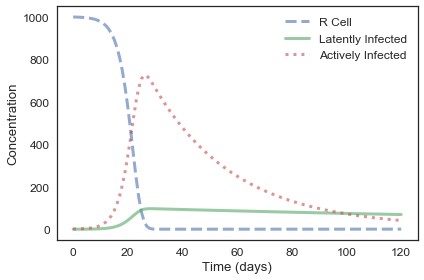

In [65]:
plot_results(results.R,results.L,results.E)

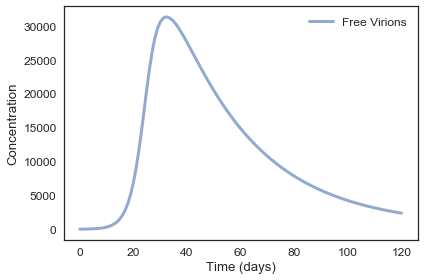

In [66]:
plot(results.V, '-', label='Free Virions')
decorate(xlabel='Time (days)',
             ylabel='Concentration')

In [67]:
# HIV with ODE

In [68]:
def slope_func(state, t, system):
    R, L, E, V = state
    unpack(system)
    
    delta_R = (R_birthrate * R_activation_rate) - (RL_death_rate * R) - (R_infection_rate * R * V)
    delta_L = (latent_infec_rate * R_infection_rate * R * V) - (RL_death_rate * L) - (L_activation_rate * L)
    delta_E = ((1-latent_infec_rate) * R_infection_rate * V * R) + (L_activation_rate * L) - (E_death_rate * E)
    delta_V = (V_birth_rate * E) - (V_death_rate * V)
    
    return delta_R, delta_L, delta_E, delta_V 

In [69]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,728
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


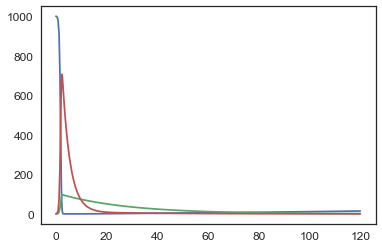

In [72]:
results.R.plot()
results.L.plot()
results.E.plot()

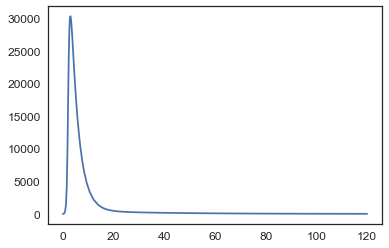

In [73]:
results.V.plot()

In [ ]:
# virus population is much larger than other cells population